<a href="https://colab.research.google.com/github/dana-prthv/ORINSON-INTERNSHIP/blob/main/Orinson_Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [102]:
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Housing.csv'
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [103]:
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [105]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


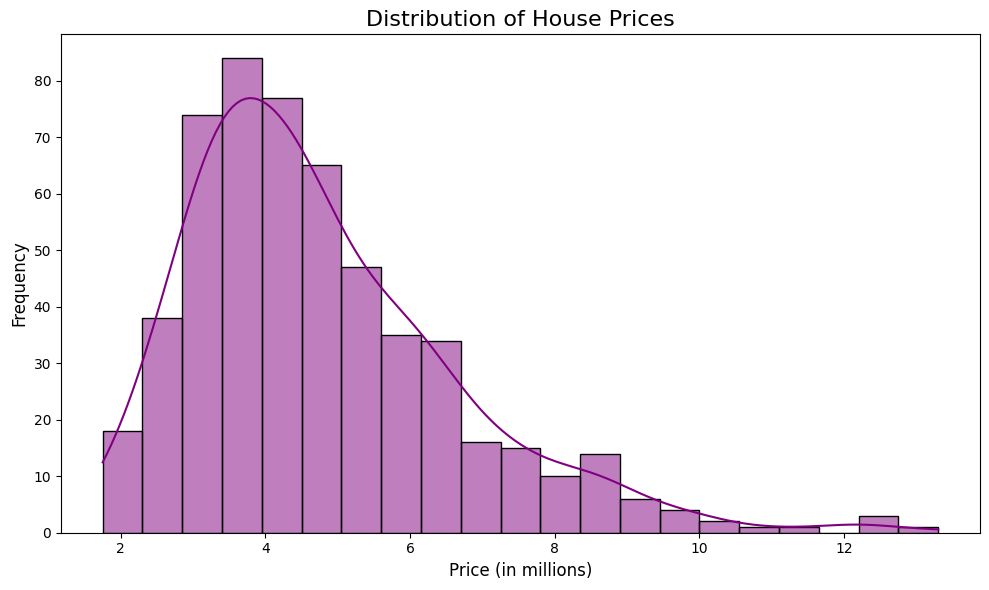

In [106]:
df['price_millions'] = df['price'] / 1e6

plt.figure(figsize=(10, 6))
sns.histplot(df['price_millions'], kde=True, color='purple', edgecolor='black')

plt.title('Distribution of House Prices', fontsize=16)
plt.xlabel('Price (in millions)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

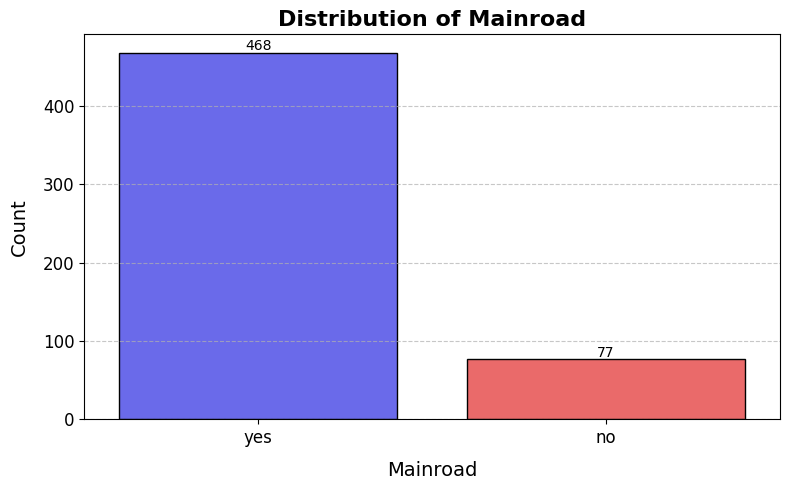

In [107]:
plt.figure(figsize=(8, 5))

ax = sns.countplot(x=df['mainroad'], hue=df['mainroad'], palette='seismic', dodge=False, edgecolor='black', order=['yes', 'no'])

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height() + 3),
                ha='center', fontsize=10)

plt.title("Distribution of Mainroad", fontsize=16, fontweight='bold')
plt.xlabel("Mainroad", fontsize=14, labelpad=10)
plt.ylabel("Count", fontsize=14, labelpad=10)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend([], [], frameon=False)

plt.tight_layout()
plt.show()

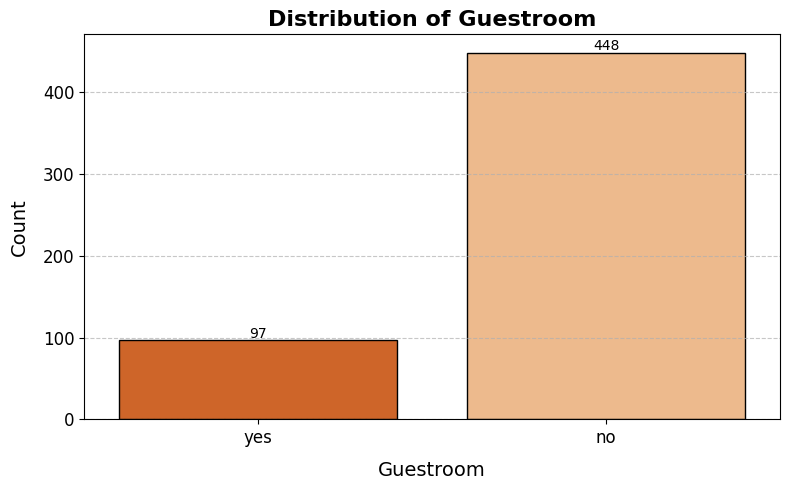

In [108]:
plt.figure(figsize=(8, 5))

ax = sns.countplot(x=df['guestroom'], hue=df['guestroom'], palette='Oranges', dodge=False, edgecolor='black', order=['yes', 'no'])

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height() + 3),
                ha='center', fontsize=10)

plt.title("Distribution of Guestroom", fontsize=16, fontweight='bold')
plt.xlabel("Guestroom", fontsize=14, labelpad=10)
plt.ylabel("Count", fontsize=14, labelpad=10)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend([], [], frameon=False)

plt.tight_layout()
plt.show()

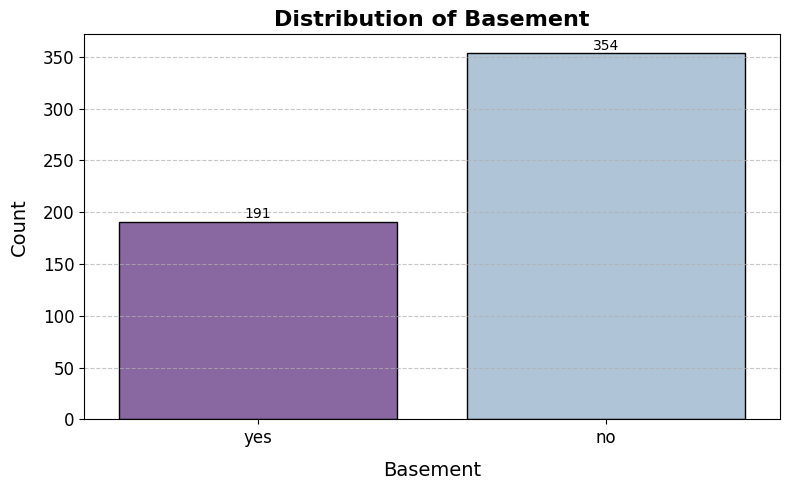

In [109]:
plt.figure(figsize=(8, 5))

ax = sns.countplot(x=df['basement'], hue=df['basement'], palette='BuPu', dodge=False, edgecolor='black', order=['yes', 'no'])

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height() + 3),
                ha='center', fontsize=10)

plt.title("Distribution of Basement", fontsize=16, fontweight='bold')
plt.xlabel("Basement", fontsize=14, labelpad=10)
plt.ylabel("Count", fontsize=14, labelpad=10)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend([], [], frameon=False)

plt.tight_layout()
plt.show()

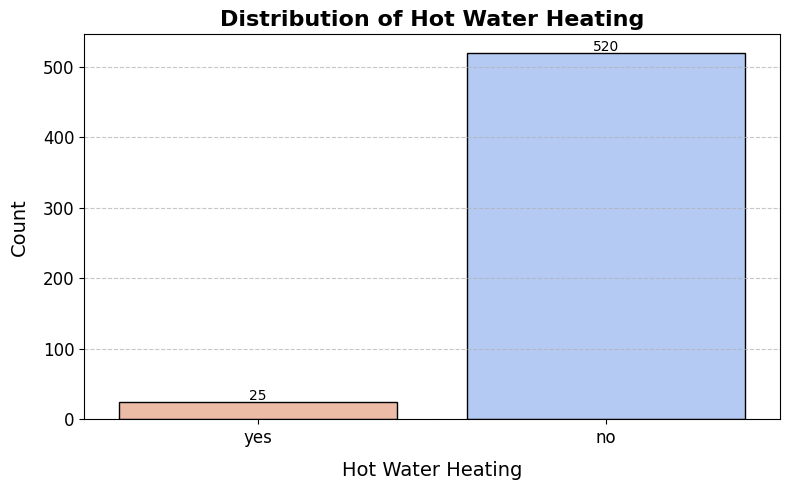

In [110]:
plt.figure(figsize=(8, 5))

ax = sns.countplot(x=df['hotwaterheating'], hue=df['hotwaterheating'], palette='coolwarm', dodge=False, edgecolor='black', order=['yes', 'no'])

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height() + 3),
                ha='center', fontsize=10)

plt.title("Distribution of Hot Water Heating", fontsize=16, fontweight='bold')
plt.xlabel("Hot Water Heating", fontsize=14, labelpad=10)
plt.ylabel("Count", fontsize=14, labelpad=10)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend([], [], frameon=False)

plt.tight_layout()
plt.show()

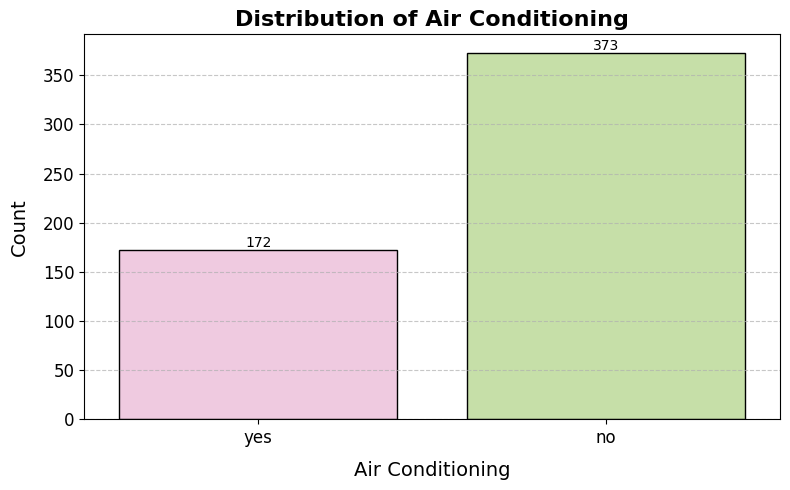

In [111]:
plt.figure(figsize=(8, 5))

ax = sns.countplot(x=df['airconditioning'], hue=df['airconditioning'], palette='PiYG', dodge=False, edgecolor='black', order=['yes', 'no'])

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height() + 3),
                ha='center', fontsize=10)

plt.title("Distribution of Air Conditioning", fontsize=16, fontweight='bold')
plt.xlabel("Air Conditioning", fontsize=14, labelpad=10)
plt.ylabel("Count", fontsize=14, labelpad=10)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend([], [], frameon=False)

plt.tight_layout()
plt.show()

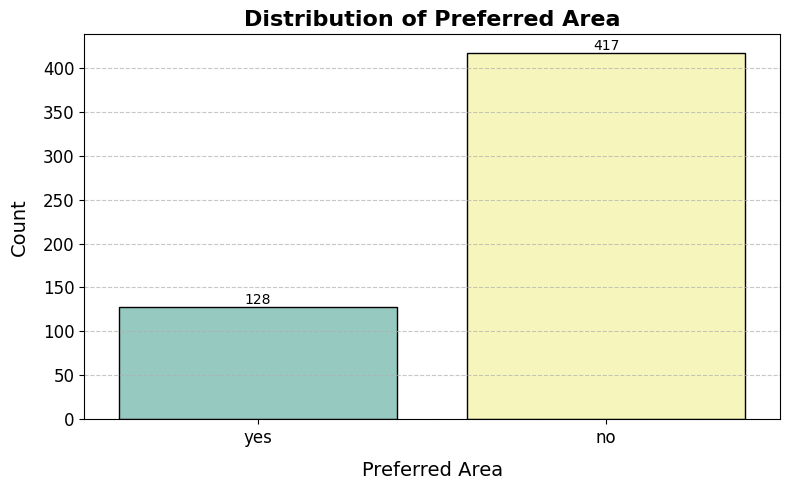

In [112]:
plt.figure(figsize=(8, 5))

ax = sns.countplot(x=df['prefarea'], hue=df['prefarea'], palette='Set3', dodge=False, edgecolor='black', order=['yes', 'no'])

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height() + 3),
                ha='center', fontsize=10)

plt.title("Distribution of Preferred Area", fontsize=16, fontweight='bold')
plt.xlabel("Preferred Area", fontsize=14, labelpad=10)
plt.ylabel("Count", fontsize=14, labelpad=10)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend([], [], frameon=False)

plt.tight_layout()
plt.show()

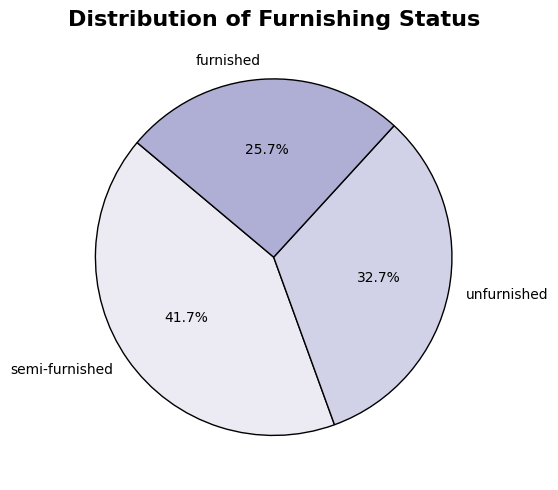

In [113]:
furnishing_counts = df['furnishingstatus'].value_counts()
plt.figure(figsize=(8, 5))
plt.pie(
    furnishing_counts,
    labels=furnishing_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('Purples'),
    wedgeprops={'edgecolor': 'black'}
)

plt.title("Distribution of Furnishing Status", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

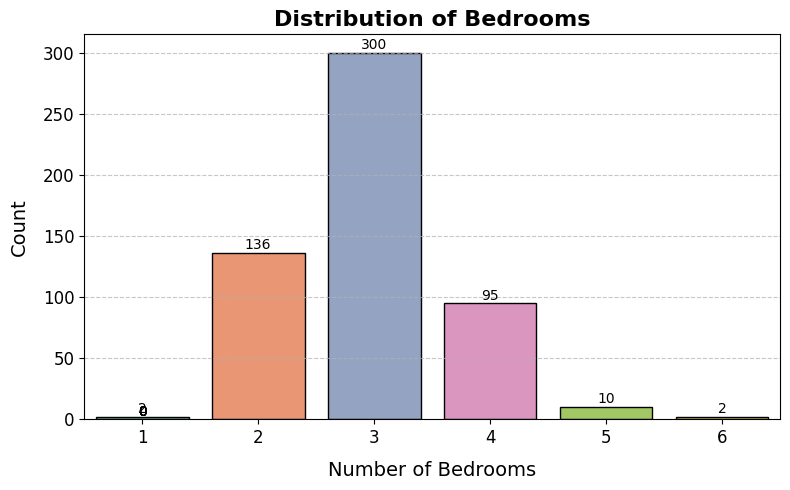

In [114]:
plt.figure(figsize=(8, 5))

ax = sns.countplot(x=df['bedrooms'], hue=df['bedrooms'], palette='Set2', dodge=False, edgecolor='black')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height() + 3),
                ha='center', fontsize=10)

plt.title("Distribution of Bedrooms", fontsize=16, fontweight='bold')
plt.xlabel("Number of Bedrooms", fontsize=14, labelpad=10)
plt.ylabel("Count", fontsize=14, labelpad=10)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend([], [], frameon=False)

plt.tight_layout()
plt.show()

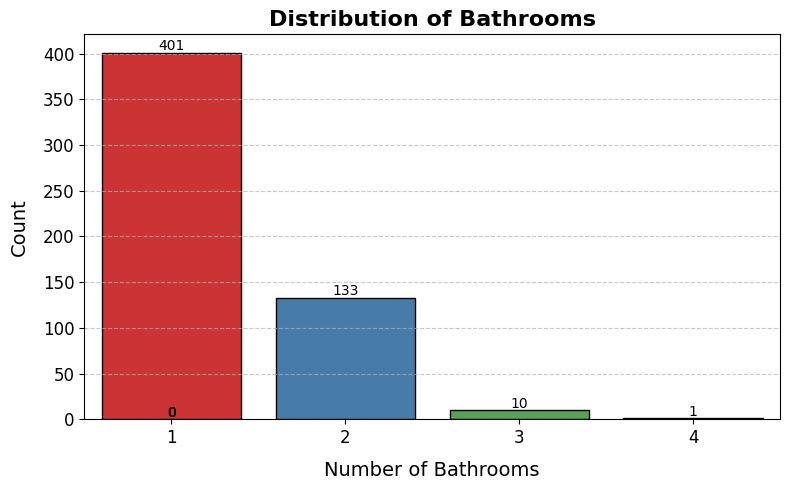

In [115]:
plt.figure(figsize=(8, 5))

ax = sns.countplot(x=df['bathrooms'], hue=df['bathrooms'], palette='Set1', dodge=False, edgecolor='black')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height() + 3),
                ha='center', fontsize=10)

plt.title("Distribution of Bathrooms", fontsize=16, fontweight='bold')
plt.xlabel("Number of Bathrooms", fontsize=14, labelpad=10)
plt.ylabel("Count", fontsize=14, labelpad=10)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend([], [], frameon=False)

plt.tight_layout()
plt.show()

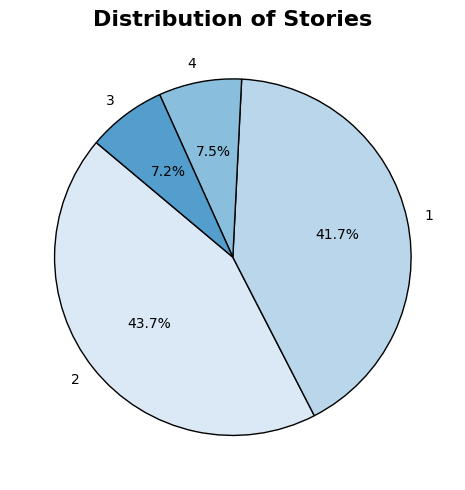

In [116]:
stories_counts = df['stories'].value_counts()

plt.figure(figsize=(8, 5))
plt.pie(
    stories_counts,
    labels=stories_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('Blues'),
    wedgeprops={'edgecolor': 'black'}
)

plt.title("Distribution of Stories", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

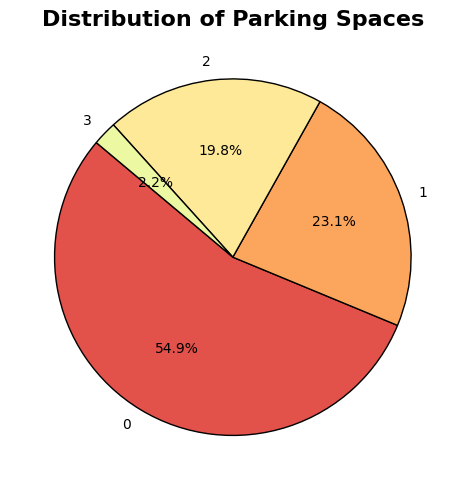

In [117]:
parking_counts = df['parking'].value_counts()

plt.figure(figsize=(8, 5))
plt.pie(
    parking_counts,
    labels=parking_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('Spectral'),
    wedgeprops={'edgecolor': 'black'}
)

plt.title("Distribution of Parking Spaces", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

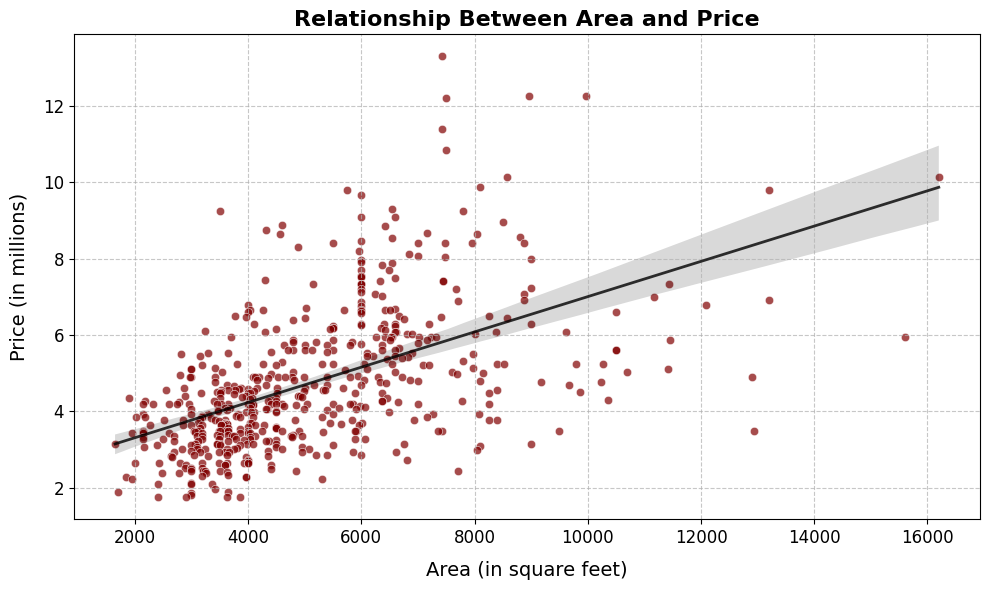

In [118]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x=df['area'], y=df['price_millions'], alpha=0.7,color='maroon', edgecolor='w')

sns.regplot(x=df['area'], y=df['price_millions'], scatter=False, color='black', line_kws={'linewidth': 2, 'alpha': 0.8})

plt.title("Relationship Between Area and Price", fontsize=16, fontweight='bold')
plt.xlabel("Area (in square feet)", fontsize=14, labelpad=10)
plt.ylabel("Price (in millions)", fontsize=14, labelpad=10)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

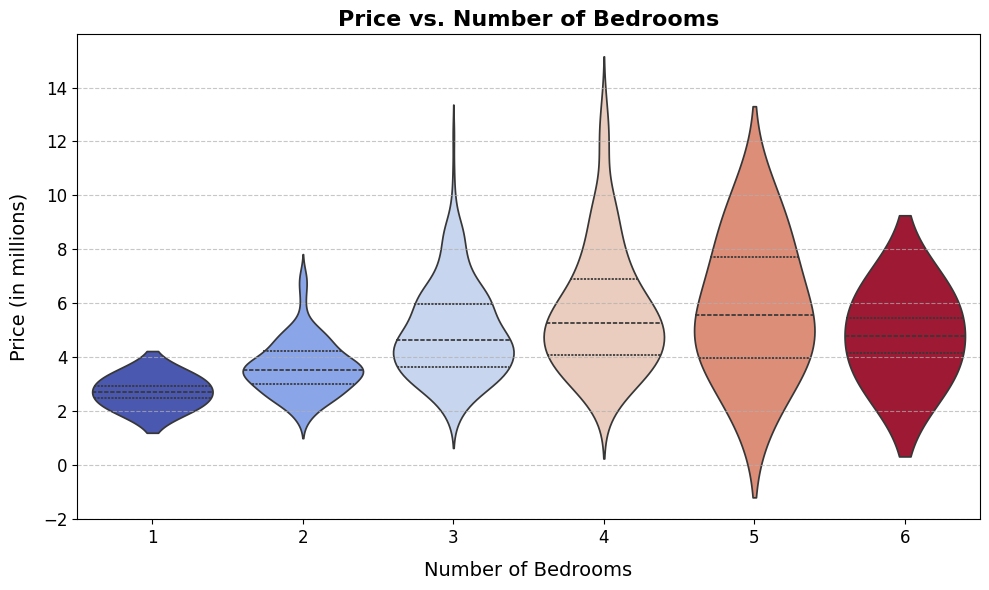

In [119]:
plt.figure(figsize=(10, 6))

sns.violinplot(x=df['bedrooms'], y=df['price_millions'], hue=df['bedrooms'], dodge=False, palette='coolwarm', inner='quart')

plt.title("Price vs. Number of Bedrooms", fontsize=16, fontweight='bold')
plt.xlabel("Number of Bedrooms", fontsize=14, labelpad=10)
plt.ylabel("Price (in millions)", fontsize=14, labelpad=10)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend([], [], frameon=False)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

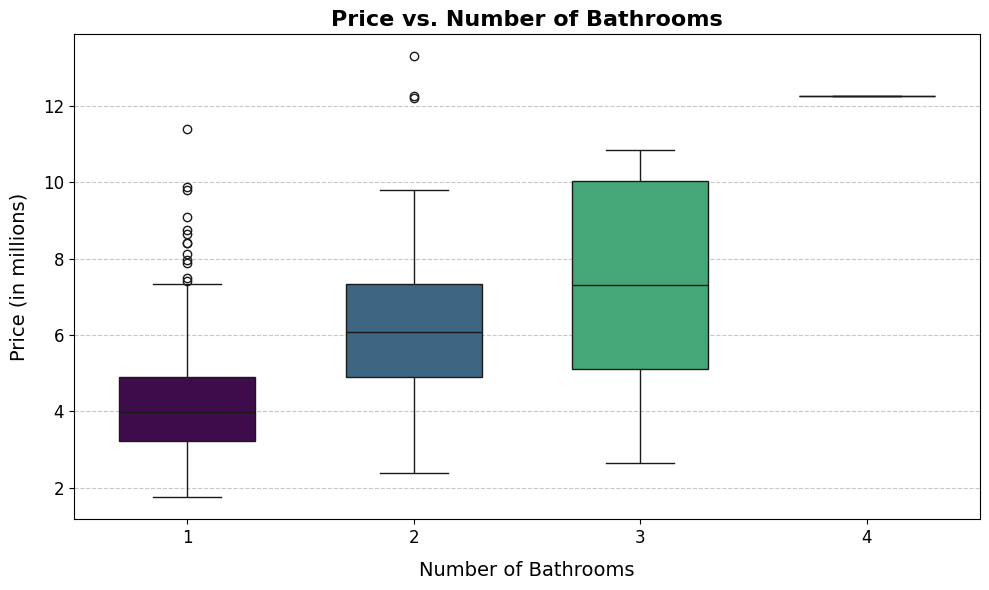

In [120]:
plt.figure(figsize=(10, 6))

sns.boxplot(x=df['bathrooms'], y=df['price_millions'], hue=df['bathrooms'], dodge=False, width=0.6, palette='viridis')

plt.title("Price vs. Number of Bathrooms", fontsize=16, fontweight='bold')
plt.xlabel("Number of Bathrooms", fontsize=14, labelpad=10)
plt.ylabel("Price (in millions)", fontsize=14, labelpad=10)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend([], [], frameon=False)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

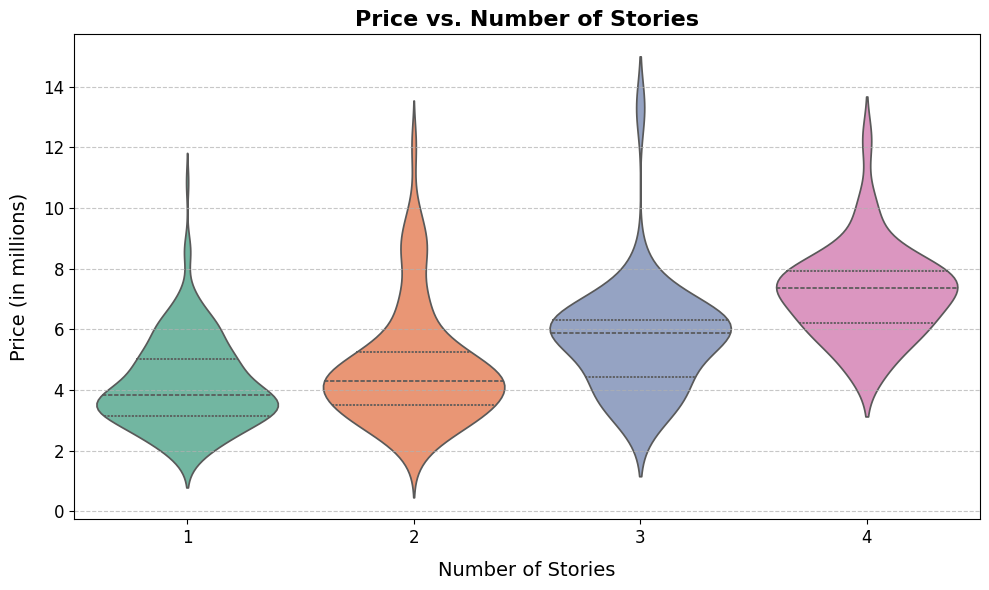

In [121]:
plt.figure(figsize=(10, 6))

sns.violinplot(
    x=df['stories'],
    y=df['price_millions'],
    hue=df['stories'],
    dodge=False,
    palette='Set2',
    inner='quart'
)

plt.title("Price vs. Number of Stories", fontsize=16, fontweight='bold')
plt.xlabel("Number of Stories", fontsize=14, labelpad=10)
plt.ylabel("Price (in millions)", fontsize=14, labelpad=10)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend([], [], frameon=False)

plt.tight_layout()
plt.show()

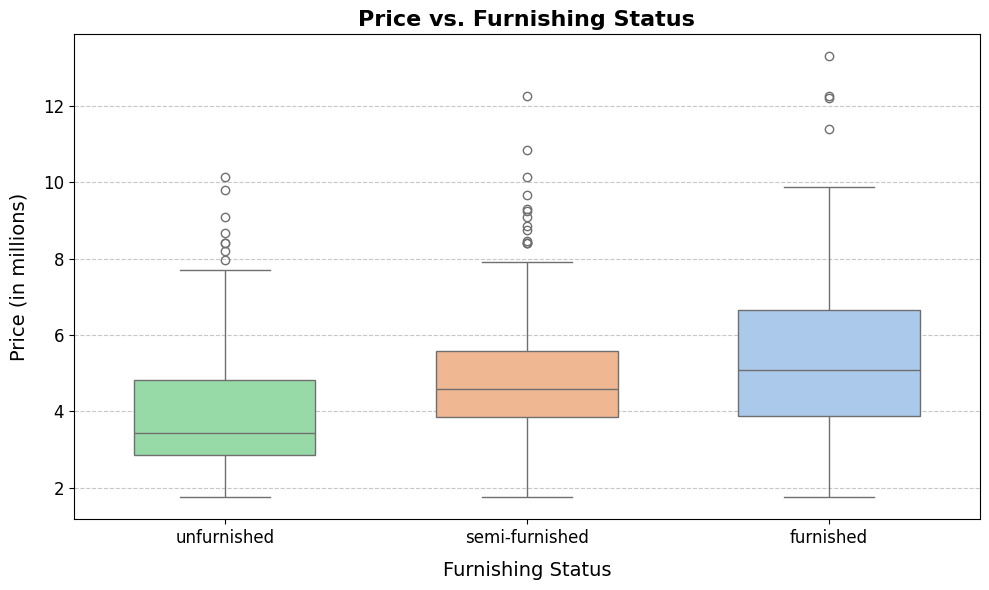

In [122]:
plt.figure(figsize=(10, 6))

sns.boxplot(
    x=df['furnishingstatus'],
    y=df['price_millions'],
    hue=df['furnishingstatus'],
    dodge=False,
    width=0.6,
    palette='pastel',
    order=['unfurnished', 'semi-furnished', 'furnished']
)

plt.title("Price vs. Furnishing Status", fontsize=16, fontweight='bold')
plt.xlabel("Furnishing Status", fontsize=14, labelpad=10)
plt.ylabel("Price (in millions)", fontsize=14, labelpad=10)

plt.legend([], [], frameon=False)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

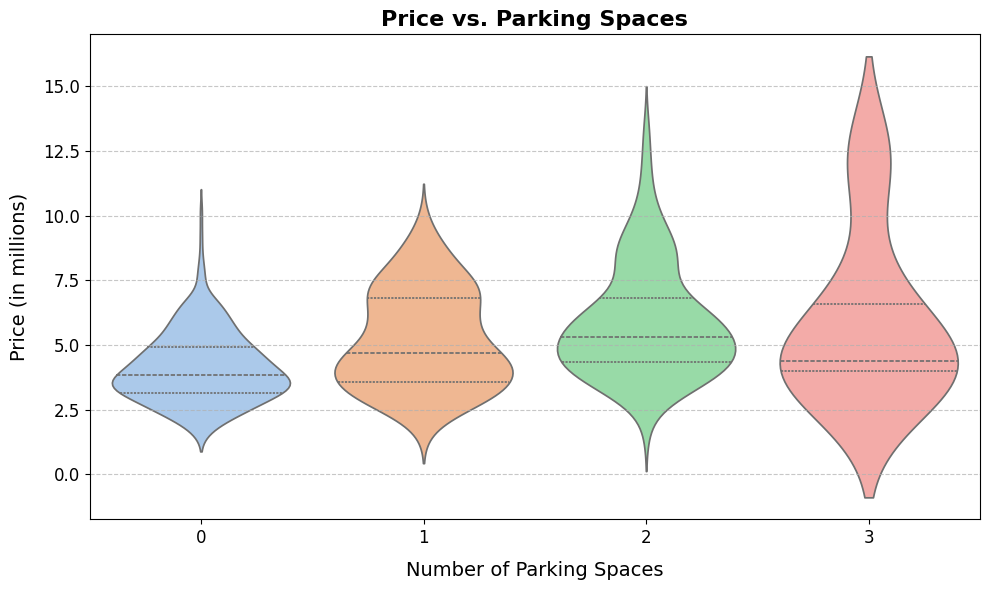

In [123]:
plt.figure(figsize=(10, 6))

sns.violinplot(
    x=df['parking'],
    y=df['price_millions'],
    hue=df['parking'],
    dodge=False,
    palette='pastel',
    inner='quart'
)

plt.title("Price vs. Parking Spaces", fontsize=16, fontweight='bold')
plt.xlabel("Number of Parking Spaces", fontsize=14, labelpad=10)
plt.ylabel("Price (in millions)", fontsize=14, labelpad=10)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend([], [], frameon=False)

plt.tight_layout()
plt.show()

In [124]:
encoder = LabelEncoder()

encoding_col = ['furnishingstatus', 'prefarea', 'airconditioning',
                'hotwaterheating', 'basement', 'guestroom', 'mainroad']

for col in encoding_col:
    df[col] = encoder.fit_transform(df[col])

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_millions
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,13.300
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,12.250
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,12.250
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,12.215
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,11.410


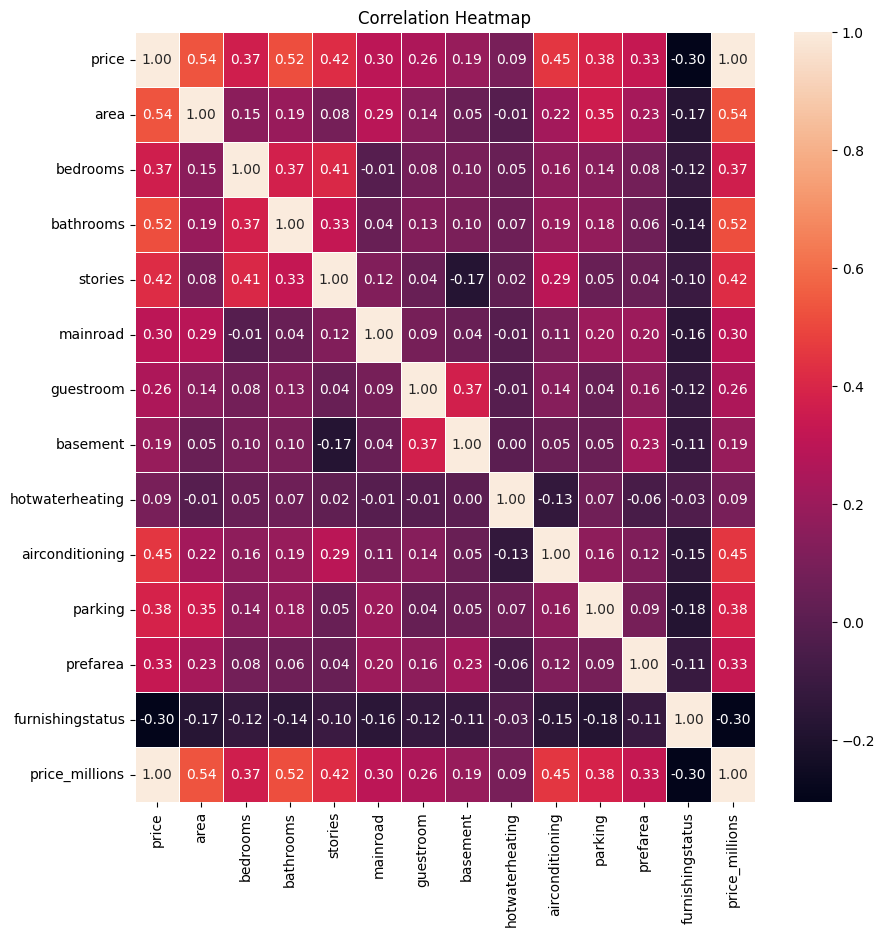

In [125]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", linewidths=0.5, cbar=True)
plt.title("Correlation Heatmap")
plt.show()

In [126]:
df = df.drop(columns=['price'], axis=1)

X = df.drop(columns=['price_millions'], axis=1)
y = df['price_millions']


In [127]:
scaler = MinMaxScaler()

X = scaler.fit_transform(X)

y = scaler.fit_transform(y.values.reshape(-1, 1))

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [129]:
ln_model = LinearRegression()
ln_model.fit(X_train, y_train)

LinearRegression()

In [130]:
y_pred = ln_model.predict(X_test)

ln_r2 = r2_score(y_test, y_pred)
ln_mae = mean_absolute_error(y_test, y_pred)
ln_mse = mean_squared_error(y_test, y_pred)
ln_rmse = np.sqrt(ln_mse)

print("Linear Regression Metrics:")
print("R² Score:", ln_r2)
print("Mean Absolute Error (MAE):", ln_mae)
print("Mean Squared Error (MSE):", ln_mse)
print("Root Mean Squared Error (RMSE):", ln_rmse)

Linear Regression Metrics:
R² Score: 0.7624579467323475
Mean Absolute Error (MAE): 0.06332171625253742
Mean Squared Error (MSE): 0.006055724882518719
Root Mean Squared Error (RMSE): 0.07781853816744902


In [131]:
dt_model = DecisionTreeRegressor(random_state=50)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=50)

In [132]:
y_pred = dt_model.predict(X_test)

dt_r2 = r2_score(y_test, y_pred)
dt_mae = mean_absolute_error(y_test, y_pred)
dt_mse = mean_squared_error(y_test, y_pred)
dt_rmse = np.sqrt(dt_mse)

print("Decision Tree Metrics:")
print("R² Score:", dt_r2)
print("Mean Absolute Error (MAE):", dt_mae)
print("Mean Squared Error (MSE):", dt_mse)
print("Root Mean Squared Error (RMSE):", dt_rmse)

Decision Tree Metrics:
R² Score: 0.1412462288809122
Mean Absolute Error (MAE): 0.10237125382262995
Mean Squared Error (MSE): 0.021892446024549074
Root Mean Squared Error (RMSE): 0.14796096115039628


In [133]:
# Hyper tuning the model
param_distributions = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': [0.1, 1, 10, 100, 1000],
    'epsilon': [0.001, 0.01, 0.1, 0.5],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1]
}

random_search = RandomizedSearchCV(
    estimator=SVR(),
    param_distributions=param_distributions,
    n_iter=50,
    scoring='r2',
    cv=5,
    verbose=2,
    random_state=50,
    n_jobs=-1
)

random_search.fit(X_train, y_train.ravel())

best_svr_model = random_search.best_estimator_
print("Best Hyperparameters for SVR:", random_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters for SVR: {'kernel': 'linear', 'gamma': 0.01, 'epsilon': 0.001, 'C': 1000}


In [134]:
y_pred = best_svr_model.predict(X_test)

In [135]:
svr_r2 = r2_score(y_test, y_pred)
svr_mae = mean_absolute_error(y_test, y_pred)
svr_mse = mean_squared_error(y_test, y_pred)
svr_rmse = np.sqrt(svr_mse)

print("Optimised Support Vector Regressor Metrics:")
print("R² Score:", svr_r2)
print("Mean Absolute Error (MAE):", svr_mae)
print("Mean Squared Error (MSE):", svr_mse)
print("Root Mean Squared Error (RMSE):", svr_rmse)

Optimised Support Vector Regressor Metrics:
R² Score: 0.746706724160157
Mean Absolute Error (MAE): 0.06345326969854449
Mean Squared Error (MSE): 0.006457275130773193
Root Mean Squared Error (RMSE): 0.08035717224226592


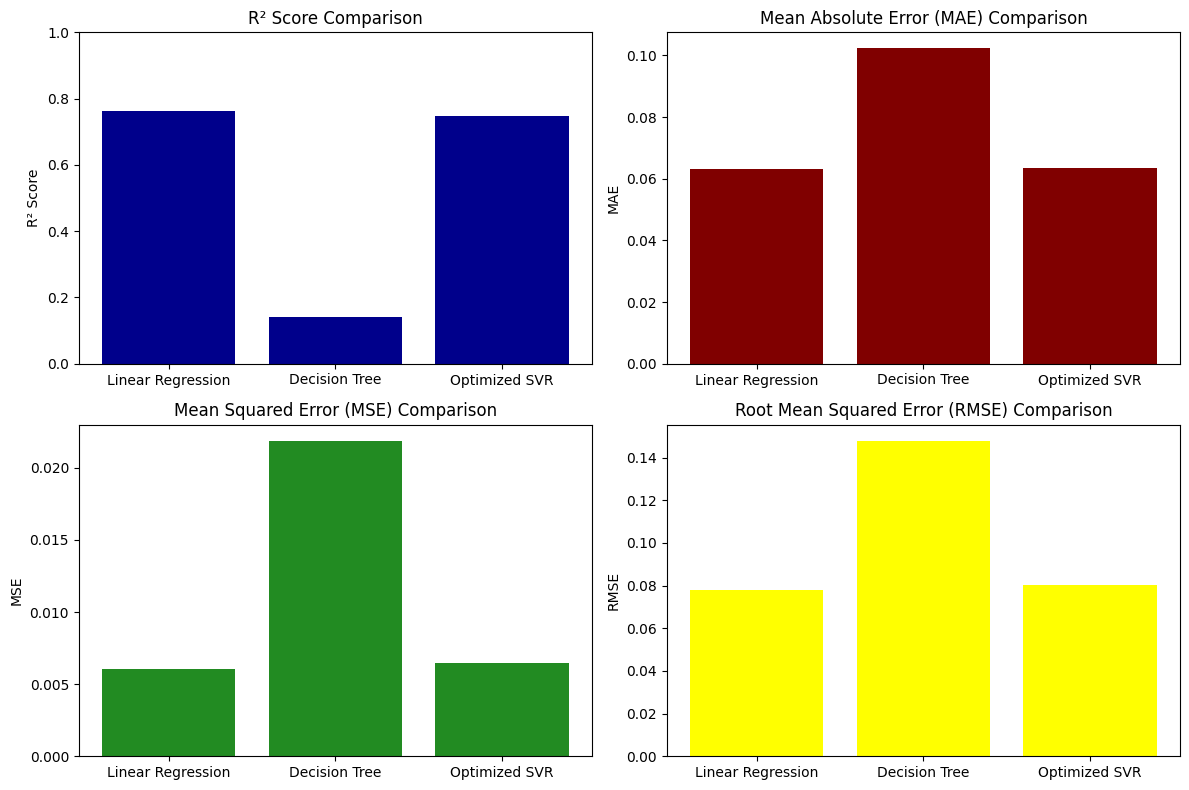

In [137]:
models = ['Linear Regression', 'Decision Tree', 'Optimized SVR']
r2_scores = [ln_r2, dt_r2, svr_r2]
mae_scores = [ln_mae, dt_mae, svr_mae]
mse_scores = [ln_mse, dt_mse, svr_mse]
rmse_scores = [ln_rmse, dt_rmse, svr_rmse]

# R² Scores
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.bar(models, r2_scores, color='darkblue')
plt.title('R² Score Comparison')
plt.ylabel('R² Score')
plt.ylim(0, 1)

# MAE Scores
plt.subplot(2, 2, 2)
plt.bar(models, mae_scores, color='maroon')
plt.title('Mean Absolute Error (MAE) Comparison')
plt.ylabel('MAE')

# MSE Scores
plt.subplot(2, 2, 3)
plt.bar(models, mse_scores, color='forestgreen')
plt.title('Mean Squared Error (MSE) Comparison')
plt.ylabel('MSE')

# RMSE Scores
plt.subplot(2, 2, 4)
plt.bar(models, rmse_scores, color='yellow')
plt.title('Root Mean Squared Error (RMSE) Comparison')
plt.ylabel('RMSE')

plt.tight_layout()
plt.show()